In [3]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

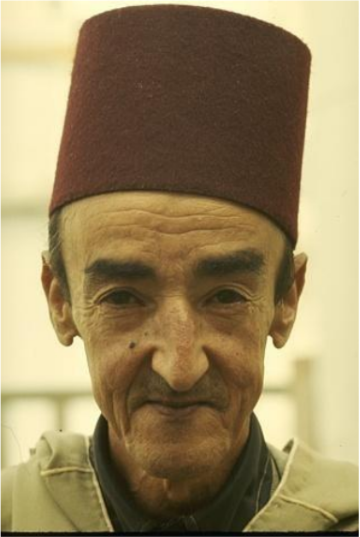

In [4]:
original_image = cv2.imread("original.png")
cv2_imshow(original_image)

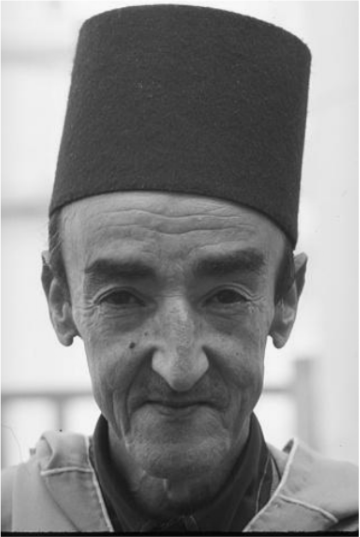

In [5]:
gray_image = cv2.cvtColor(original_image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

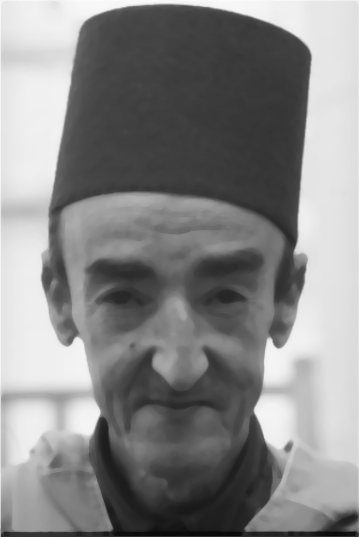

In [6]:
smoothed_gray_image = cv2.medianBlur(gray_image, ksize=7)
cv2_imshow(smoothed_gray_image)

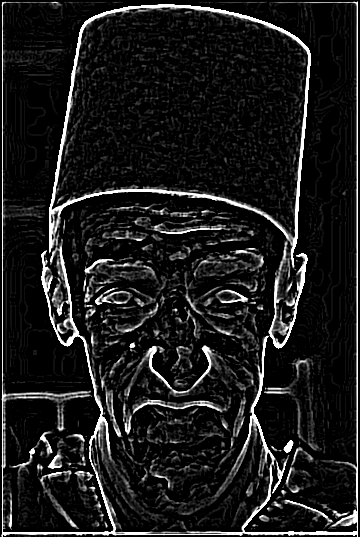

In [7]:
image_post_Laplacian = cv2.Laplacian(smoothed_gray_image, cv2.CV_8U, ksize=5)
cv2_imshow(image_post_Laplacian)

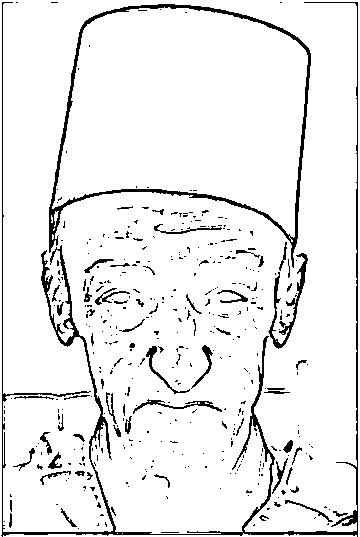

In [8]:
_, image_after_threshold = cv2.threshold(image_post_Laplacian, 125, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(image_after_threshold)

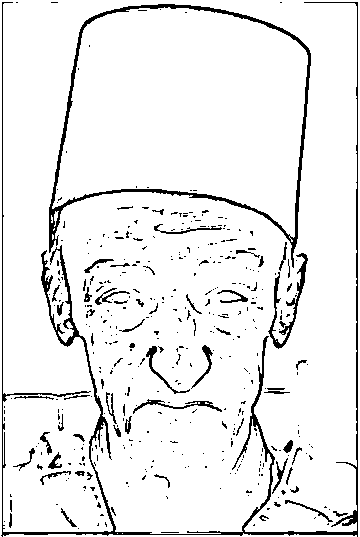

(537, 360, 3)


In [9]:
image_after_threshold_BGR = cv2.cvtColor(image_after_threshold, cv2.COLOR_GRAY2BGR)
cv2_imshow(image_after_threshold_BGR)
print(image_after_threshold_BGR.shape)

In [10]:
def apply_bilateral_filter(original_image, sigma_space = 9, sigma_color = 9, filter_size = 9, repetition_count = 4): 
  small_dim = (256, 256)
  original_dim = (original_image.shape[1], original_image.shape[0])
  resized_original = cv2.resize(original_image, small_dim, interpolation = cv2.INTER_AREA)
  smoothed_3_channel_image = resized_original
  for _ in range(repetition_count):
    smoothed_3_channel_image = cv2.bilateralFilter(smoothed_3_channel_image, d = filter_size, sigmaColor = sigma_color, sigmaSpace = sigma_space)
  smoothed_3_channel_image = cv2.resize(smoothed_3_channel_image, original_dim, interpolation = cv2.INTER_AREA)
  return smoothed_3_channel_image

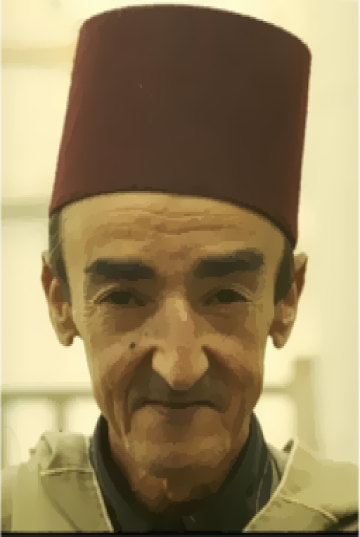

In [11]:
smoothed_3_channel_image = apply_bilateral_filter(original_image)
cv2_imshow(smoothed_3_channel_image)

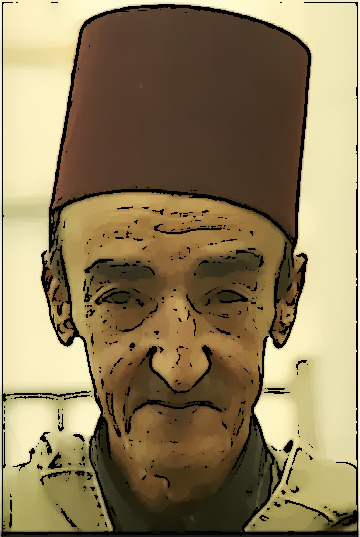

In [12]:
cartoonified_image = cv2.bitwise_and(smoothed_3_channel_image, image_after_threshold_BGR)
cv2_imshow(cartoonified_image)

In [13]:
def cartoonify_image(image_path, output_folder_name = "Image1"):
  input_image = cv2.imread(image_path)
  if not os.path.isdir(output_folder_name):
    os.mkdir(output_folder_name)

  path = os.path.join(output_folder_name, "original.png")
  cv2.imwrite(path, input_image)
  
  gray_image = cv2.cvtColor(input_image, code=cv2.COLOR_BGR2GRAY)
  path = os.path.join(output_folder_name, "gray_image.png")
  cv2.imwrite(path, gray_image)
  
  smoothed_gray_image = cv2.medianBlur(gray_image, ksize=7)
  path = os.path.join(output_folder_name, "smoothed_gray_image.png")
  cv2.imwrite(path, smoothed_gray_image)

  image_post_Laplacian = cv2.Laplacian(smoothed_gray_image, cv2.CV_8U, ksize=5)
  path = os.path.join(output_folder_name, "image_post_Laplacian.png")
  cv2.imwrite(path, image_post_Laplacian)

  _, image_after_threshold = cv2.threshold(image_post_Laplacian, 125, 255, cv2.THRESH_BINARY_INV)
  path = os.path.join(output_folder_name, "image_after_threshold.png")
  cv2.imwrite(path, image_after_threshold)

  image_after_threshold_BGR = cv2.cvtColor(image_after_threshold, cv2.COLOR_GRAY2BGR)
  assert len(image_after_threshold_BGR.shape) == 3

  smoothed_3_channel_image = apply_bilateral_filter(input_image)
  path = os.path.join(output_folder_name, "smoothed_3_channel_image.png")
  cv2.imwrite(path, smoothed_3_channel_image)

  cartoonified_image = cv2.bitwise_and(smoothed_3_channel_image, image_after_threshold_BGR)
  path = os.path.join(output_folder_name, "cartoonified_image.png")
  cv2.imwrite(path, cartoonified_image)

  return cartoonified_image

In [14]:
cartoonified_image = cartoonify_image("original.png", output_folder_name="outputImages")